In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4 - Distributions

The questions in each lab will be autograded, and all the autograded tests will give you immediate feedback directly in the notebook. This way you can quickly iterate and learn how to create your visualization during the lab time. After you upload your lab on gradescope, the same tests will run again and you will be able to see your score right away.

## Submission instructions

<div class="alert alert-info" style="color:black">
<ul>
  <li>Download this lab from the Jupyter Book web page by clicking the download symbol at the top right of the page and selecting the <code>.ipynb</code> format.</li>
  <li>To submit this lab, answer all the questions and then upload the completed lab to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells (click the ▶▶ button).</li>
    </ul>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  </li>
</ul>
</div>

## Visualizing distributions of birds

In this lab we are going to work with a dataset of hawks
that have been captured and measured by researchers.
We will need to do some preprocessing of the data we are going to use,
so you can just follow along in the next cell. In order to better represent EDA processes, some of the tests are hidden.

In [2]:
import pandas as pd


url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/hawks.csv'
hawks = pd.read_csv(
    url
).drop(  # Remove columns that we will not use in this lab
    columns=['Unnamed: 0', 'ReleaseTime', 'StandardTail', 'Tarsus',
             'WingPitFat', 'KeelFat', 'Crop', 'BandNumber', 'CaptureTime',
             'Month', 'Day']
).dropna(
).query(  # Remove a few extreme values to make the charts easier to interpret
    'Hallux < 40 & Species != "RT" & Weight < 1000'
).rename(  # Make all columns start with lower case
    columns=lambda x: x.lower()
)

hawks

,year,species,age,sex,wing,weight,culmen,hallux,tail
3,1992,CH,I,F,265.0,470.0,18.7,23.5,220
4,1992,SS,I,F,205.0,170.0,12.5,14.3,157
28,1992,SS,I,F,205.0,180.0,11.7,15.0,164
40,1993,SS,I,M,171.0,88.0,9.7,11.5,136
52,1993,SS,I,F,202.0,134.0,12.4,13.7,158
...,...,...,...,...,...,...,...,...,...
894,2003,SS,I,F,198.0,190.0,12.2,15.8,158
895,2003,SS,I,F,190.0,200.0,12.7,15.0,157
896,2003,SS,I,F,197.0,185.0,12.8,15.6,157
898,2003,SS,I,F,200.0,185.0,12.8,15.2,158


You can view a short description of the data frame columns in this table:

| Column       | Description                                                                                      |
|--------------|--------------------------------------------------------------------------------------------------|
| year | Year of capture
| species      | CH=Cooper's or SS=Sharp-Shinned                                                       |
| age          | A=Adult or I=Imature                                                                             |
| sex          | F=Female or M=Male                                                                               |
| wing         | Length (in mm) of primary wing feather from tip to wrist it attaches to                          |
| weight       | Body weight (in gm)                                                                              |
| culmen       | Length (in mm) of the upper bill from the tip to where it bumps into the fleshy part of the bird |
| hallux       | Length (in mm) of the killing talon                                                              |
| tail         | Measurement (in mm) related to the length of the tail                                            |

In [3]:
# Run this cell to ensure that altair plots show up on gradescope
# We will talk more about what these lines do later in the course
import altair as alt

# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Question 1

<div class="alert alert-info" style="color:black">

Let's start by visualizing the distribution
of the weight of the measured birds
using a histogram.

1. Create a histogram for the weight of all the hawks in the dataset
   using the default number of bins.
2. Write down your main observations from the histogram.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

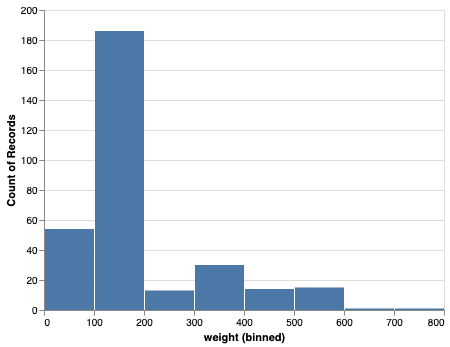

In [4]:
histogram = alt.Chart(hawks).mark_bar().encode(
    alt.X('weight:Q', bin=True),
    alt.Y('count()')
)
# Show the chart
histogram

In [5]:
grader.check("q1")

q1 results: All test cases passed!

Main observations:
1. Most of the birds weigh less than 200.
2. There are small amounts of birds weigh higher than 600.

### Question 2

<div class="alert alert-info" style="color:black">
    
Let's explore the same distribution with a density plot instead of a histogram.

1. Create a density plot for the distribution of the weight column.
2. What are the main observations you take away from the density plot.
   Are any of them different from the histogram? Why is that?
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

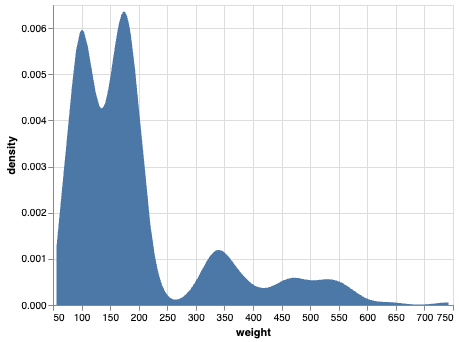

In [6]:
density = alt.Chart(hawks).mark_area().encode(
    alt.X('weight:Q'),
    alt.Y('density:Q')
).transform_density(
    'weight',
    as_=['weight', 'density'],
)
# Show the plot
density

In [7]:
grader.check("q2")

q2 results: All test cases passed!

Main observations:
1. Birds with weight around 100 and 200 respectively have a high density.
2. The whole graph is skewed.

Difference:
- The density around 100 weight is higher than the counts around that weight in histogram.

Reason:
- The density starts from a very low value in [0, 100] and the density for each point in [100, 200] is higher than 0.004, so the total density from 0 to 100 is much lower than the density from 100 to 200. Therefore, even in the density graph we see that the density around 100 and 200 are almost at the same level, the counts in histogram graph are very different.

### Question 3

<div class="alert alert-info" style="color:black">

Experiment with different number of bins in the histogram from question 1,
until you have a histogram 
that delivers a similar take home message
as the density plot.

</div>

_Points:_ 6

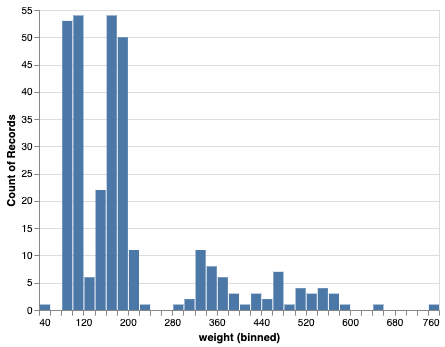

In [8]:
histogram_custom_bins = alt.Chart(hawks).mark_bar().encode(
    alt.X('weight:Q', bin=alt.BinParams(maxbins=35)),
    alt.Y('count()')
)
# Show the plot
histogram_custom_bins

In [9]:
grader.check("q3")

q3 results: All test cases passed!

### Question 4

<div class="alert alert-info" style="color:black">

In our density plot above,
we can see that there are 3-4 peaks in the distribution.
This is often an indication that there are subgroups within our data.
We could possibly identify some of these subgroups
by dividing the data according to its categorical variables.

Explore the data to find a categorical variable that can explain the two major sections in the data,
   one around 50-250 (that has the first two peaks) and one around 250-400 (that has the smaller peaks).
   Use this variable to creat a faceted chart that contains a single column of vertically stacked plots.

</div>

_Points:_ 6

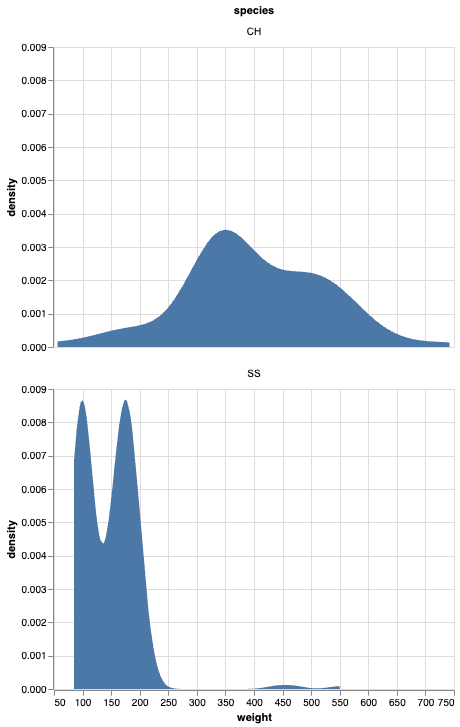

In [10]:
density_facets = alt.Chart(hawks).mark_area().encode(
    alt.X('weight:Q'),
    alt.Y('density:Q')
).transform_density(
    'weight',
    groupby=['species'],
    as_=['weight', 'density']
).facet(
    'species:N',
    columns=1
)
# Show the plot
density_facets

In [11]:
grader.check("q4")

q4 results: All test cases passed!

### Question 5

<div class="alert alert-info" style="color:black">

The faceting helped to distinguish the major peaks in the distribution of hawk weights,
but it seems like there are still two small peaks within each of the faceted plots!

Explore the remaining categorical variables by encoding them in the color channel
   and see if you can find one that corresponds to the minor peaks.

</div>

_Points:_ 8

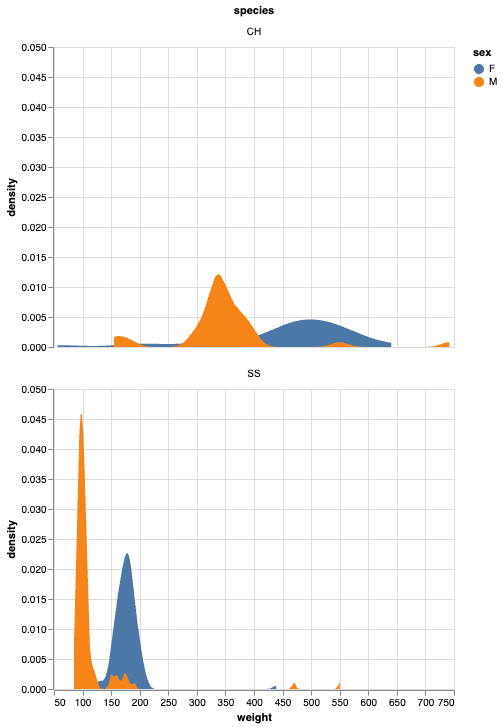

In [12]:
density_facets_color = alt.Chart(hawks).mark_area().encode(
    alt.X('weight:Q'),
    alt.Y('density:Q'),
    alt.Color('sex:N')
).transform_density(
    'weight',
    groupby=['species', 'sex'],
    as_=['weight', 'density']
).facet(
    'species:N',
    columns=1
)
# Show the plot
density_facets_color

In [13]:
grader.check("q5")

q5 results: All test cases passed!

### Question 6

<div class="alert alert-info" style="color:black">

1. Create a faceted box plot (in a single column) to compare the same subgroups as in the question above.
2. Write down which advantages and disadvantages does the boxplot has compared to the density plot?

</div>

_Points:_ 6

_Type your answer here, replacing this text._

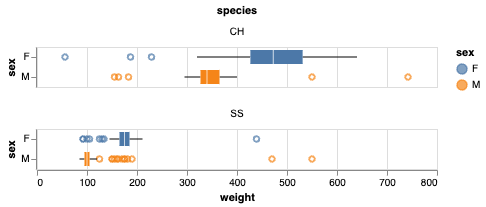

In [14]:
boxplot = alt.Chart(hawks).mark_boxplot().encode(
    alt.X('weight:Q'),
    alt.Y('sex:N'),
    alt.Color('sex:N')
).facet(
    'species:N',
    columns=1
)
# Show the plot
boxplot

In [15]:
grader.check("q6")

q6 results: All test cases passed!

Advantages:
1. Boxplot can help deal with the outliers.
2. Boxplot can tell how the data spreads out.
3. Boxplot takes up less space.

Disadvantages:
1. Boxplot cannot show the peak values.
2. Boxplot cannot determine the shape of distribution.